# Step 1: Import and Installing Libraries

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 13 kB/s 
     |████████████████████████████████| 438 kB 54.5 MB/s 
     |████████████████████████████████| 1.7 MB 53.7 MB/s 
     |████████████████████████████████| 5.9 MB 38.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 37.4 MB/s 
     |████████████████████████████████| 3.3 MB 16.8 MB/s 
     |████████████████████████████████| 10.4 MB 34.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.7 kB/s 
     |████████████████████████████████| 636 kB 48.2 MB/s 
     |████████████████████████████████| 2.0 MB 42.8 MB/s 
     |████████████████████████████████| 1.7 MB 37.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 54.9 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 268 kB 34.2 MB/s 
     |████████████████████████████████| 

In [5]:
import pycaret as pyc

In [6]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Step 2: Data Preprocessing

In [7]:
from google.colab import files 
uploads = files.upload()
#from pycaret.datasets import get_data
#dataset = get_data(' ')

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [8]:
data = pd.read_csv('Churn_Modelling.csv') 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#x= data.drop(labels=['RowNumber','CustomerId','Surname','Exited'], axis=1)
x= data.drop(labels=['RowNumber','CustomerId','Surname'], axis=1)
#y= data['Exited']

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
from sklearn.preprocessing import LabelEncoder
label_1=LabelEncoder()
x['Geography']=label_1.fit_transform(x['Geography'])

In [12]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
label_2=LabelEncoder()
x['Gender']=label_2.fit_transform(x['Gender'])

In [14]:
x.head(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1


In [15]:
x=pd.get_dummies(x, drop_first=True, columns=['Geography'])

In [16]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x.sample(frac=0.8, random_state=786).reset_index(drop=True)
x_test = x.drop(x_train.index).reset_index(drop=True)
#print("Training Data", x_train)
print(x_train.shape)
#print("Testing Data", x_test)

(8000, 12)


In [17]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.fit_transform(x_test)

In [18]:
#print(x_train.shape)
#print(x_test.shape)

In [19]:
#train_data=(x_train, y_train)
#print(train_data)

In [21]:
from pycaret.classification import *
x_clf = setup(data = x_train, target='Exited')

,Description,Value
0,session_id,5163
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8000, 12)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [22]:
x_clf_models = compare_models(n_select = 5) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8635,0.8712,0.4983,0.7622,0.6012,0.5234,0.5413,0.708
lightgbm,Light Gradient Boosting Machine,0.8628,0.8611,0.5259,0.7366,0.6128,0.5323,0.5440,0.198
rf,Random Forest Classifier,0.8587,0.8578,0.4637,0.7611,0.5753,0.4967,0.5191,0.862
ada,Ada Boost Classifier,0.8539,0.8557,0.4965,0.7114,0.5840,0.4989,0.5112,0.275
et,Extra Trees Classifier,0.8428,0.8364,0.4387,0.6907,0.5358,0.4469,0.4640,0.770
lda,Linear Discriminant Analysis,0.8384,0.8410,0.3765,0.7061,0.4902,0.4047,0.4334,0.044
ridge,Ridge Classifier,0.8337,0.0000,0.2798,0.7716,0.4087,0.3363,0.3958,0.025
qda,Quadratic Discriminant Analysis,0.7932,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.030
dummy,Dummy Classifier,0.7932,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.018
dt,Decision Tree Classifier,0.7882,0.6813,0.4991,0.4891,0.4935,0.3597,0.3601,0.045


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20

In [23]:
print(x_clf_models)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=

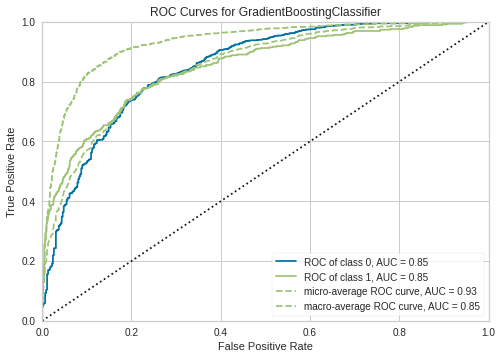

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(x_clf_models[0], plot = 'auc')

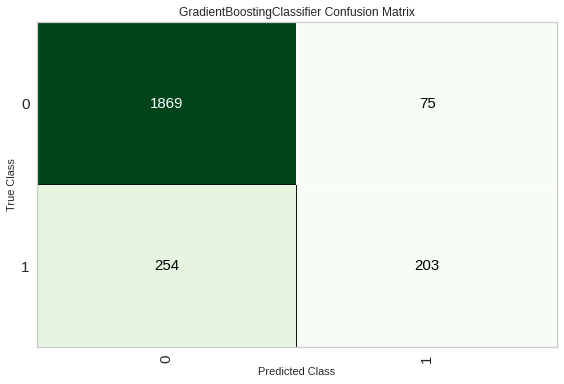

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(x_clf_models[0], plot = 'confusion_matrix')

In [26]:
predict_model(x_clf_models[0])

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.863,0.8499,0.4442,0.7302,0.5524,0.4771,0.4977


,CreditScore,Age,Balance,EstimatedSalary,Geography_1,Geography_2,Gender_1,Tenure_0,Tenure_1,Tenure_10,...,Tenure_9,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Exited,Label,Score
0,739.0,20.0,133800.984375,150245.812500,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9278
1,640.0,33.0,81677.218750,34925.558594,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9736
2,700.0,44.0,58781.761719,16874.919922,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0.5669
3,719.0,76.0,95052.289062,176244.875000,1,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6105
4,793.0,41.0,141806.453125,102921.171875,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,716.0,29.0,87946.390625,182531.734375,0,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.9238
2397,766.0,32.0,185714.281250,102502.500000,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.8606
2398,697.0,34.0,126558.921875,73334.429688,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8891
2399,773.0,34.0,126979.750000,36823.281250,1,0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7632


In [27]:
test_predict = predict_model(x_clf_models[0], data = x_test)
test_predict.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.867,0.8738,0.4795,0.748,0.5844,0.5097,0.5275


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Label,Score
0,747,1,36,8,102603.30,2,1,1,180693.61,0,1,0,0,0.9630
1,707,1,32,9,0.00,2,1,0,126475.79,0,0,1,0,0.9731
2,590,1,37,1,0.00,2,0,0,133535.99,0,0,1,0,0.9717
3,603,1,57,6,105000.85,2,1,1,87412.24,1,0,1,0,0.8471
4,615,1,45,5,0.00,2,1,1,164886.64,0,0,0,0,0.9651


In [28]:
final_gradBoost = finalize_model(x_clf_models[0])

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
           

In [29]:
test_predictions = predict_model(final_gradBoost, data = x_test)
test_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.867,0.8783,0.4667,0.7583,0.5778,0.5041,0.525


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Label,Score
0,747,1,36,8,102603.30,2,1,1,180693.61,0,1,0,0,0.9513
1,707,1,32,9,0.00,2,1,0,126475.79,0,0,1,0,0.9744
2,590,1,37,1,0.00,2,0,0,133535.99,0,0,1,0,0.9635
3,603,1,57,6,105000.85,2,1,1,87412.24,1,0,1,0,0.7934
4,615,1,45,5,0.00,2,1,1,164886.64,0,0,0,0,0.9667


In [30]:
save_model(final_gradBoost, 'Final_GBC_Model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5163, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), model_name=Final_GBC_Model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
          

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [31]:
saved_final_GBC = load_model('Final_GBC_Model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final_GBC_Model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [32]:
new_prediction = predict_model(saved_final_GBC, data=x_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.867,0.8783,0.4667,0.7583,0.5778,0.5041,0.525


In [33]:
new_prediction.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Label,Score
0,747,1,36,8,102603.30,2,1,1,180693.61,0,1,0,0,0.9513
1,707,1,32,9,0.00,2,1,0,126475.79,0,0,1,0,0.9744
2,590,1,37,1,0.00,2,0,0,133535.99,0,0,1,0,0.9635
3,603,1,57,6,105000.85,2,1,1,87412.24,1,0,1,0,0.7934
4,615,1,45,5,0.00,2,1,1,164886.64,0,0,0,0,0.9667


In [35]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 270 kB 53.8 MB/s 
     |████████████████████████████████| 2.3 MB 65.3 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 112 kB 64.4 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 212 kB 33.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 856 kB 42.4 MB/s 
     |████████████████████████████████| 4.0 MB 36.

In [36]:
create_app(final_gradBoost)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             586       1   38       2  136858.42              1          0   
1             769       1   39       9       0.00              1          1   
2             556       1   38       2  114756.14              1          1   
3             563       1   26       7       0.00              2          0   
4             611       1   46       6       0.00              2          1   
...           ...     ...  ...     ...        ...            ...        ...   
7995          778       1   37       3  141803.77              1          0   
7996          708       0   32       8  187487.63              1          1   
7997          850       0   31       1  108822.40              1          1   
7998          551       1   31       9   82293.82         

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://12789.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f33f3c93a10>,
 'http://127.0.0.1:7860/',
 'https://12789.gradio.app')